In [1105]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import paramnormal
# import seaborn as sns
# from statsmodels import api
from scipy import stats
from scipy.optimize import minimize 
import json
# import pprint


In [1106]:
# This function cleans the data and creates c_0, c_f, and log_c_f

def cleanData(df):
    # Remove unnecessary columns
    df = df.drop('Link', axis=1)
    df = df.dropna()
    #df = df[df['Cited by'] >= 0]
    c_0_list = []

    # Calc c_0
    c_0 = {year : df.loc[df['Year'] == year, 'Cited by'].mean() for year in range(2001,2020)}

    for index, row in df.iterrows():
        c_0_list.append(c_0[row['Year']])
        #df['c_0'][index] = c_0[row['Year']]
    df['c_0'] = c_0_list
    # Calc c_f
    df['c_f'] = df['Cited by'] / df['c_0']
    df['c_f'].astype(np.float64)
    
    df['log_c_f'] = np.log(df['c_f'])
    df = df[df['c_f'] >= 0.1]


    return df


In [1107]:
# Load data sets

ai_ml = pd.read_csv('AI_ML.csv')
col_sys = pd.read_csv('Swarming_MultiAgent.csv')
com_net = pd.read_csv('Communications_Networking.csv')
cont_alg = pd.read_csv('ControlSystems_Algorithms.csv')
cyb_sec = pd.read_csv('CyberSecurity.csv')
edg_com = pd.read_csv('EdgeComputing.csv')
ene_mgm = pd.read_csv('EnergyManagement.csv')
eth_reg = pd.read_csv('EthicsRegulations.csv')
hum_man = pd.read_csv('HumanMachineInteraction.csv')
loc_map = pd.read_csv('Localization_mapping.csv')
sen_fus = pd.read_csv('sensor_fusion.csv')
sen_tec = pd.read_csv('sensor_technology.csv')
sim_mod = pd.read_csv('Simulation_Modeling.csv')
tec_mob = pd.read_csv('Robotics.csv')


dataSets = [ai_ml, col_sys, com_net, cont_alg, cyb_sec, edg_com, ene_mgm, eth_reg, hum_man, loc_map, sen_fus, sen_tec, sim_mod, tec_mob]
keyNames = ["ai_ml", "col_sys", "com_net", "cont_alg", "cyb_sec", "edg_com", "ene_mgm", "eth_reg", "hum_man", "loc_map", "sen_fus", "sen_tec", "sim_mod", "tec_mob"]
fullNames = ["AI & Machine Learning", "Collaborative systems", "Communications & Networking", "Control systems & Algorithms", "Cybersecurity", "Edge Computing", "Energy Management", "Ethics & Regulations", "Human Machine Interaction", "Localization & Mapping", "Sensor Fusion", "Sensor Technologies", "Simulation & Modeling", "Technologies enabling mobility"]


In [1108]:
def MLE(dataSets):    
    dist = stats.lognorm
    bounds = {
        'loc': (0,1),
        's': (0,2),
        'scale': (0,2)
    }
    #bounds = [(0,2), (0,1), (0,5)]
    parameterDict = {}
    bins = 50

    for index, df in enumerate(dataSets):
        df = cleanData(df)
        vals = df['c_f'].values.tolist()
        #res = paramnormal.lognormal.fit(vals)
        res = stats.fit(dist, vals, bounds=bounds, method='mle')
        
        parameterDict.update({keyNames[index]: {'mu': res.params.loc}})
        parameterDict[keyNames[index]].update({'sigma': res.params.s})
        parameterDict[keyNames[index]].update({'scale': res.params.scale})
        
    return parameterDict

In [1109]:
# Perform the estimation
parameters = MLE(dataSets)

/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:1636: RuntimeWarning: overflow encountered in divide
  x = asarray((x-loc) / scale)
/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/anaconda3/env

In [1110]:
parameters

{'ai_ml': {'mu': 0.0954474328985988,
  'sigma': 1.5651434953963261,
  'scale': 0.40795202752526105},
 'col_sys': {'mu': 0.09466098761514963,
  'sigma': 1.478107405288303,
  'scale': 0.43336999934039144},
 'com_net': {'mu': 0.09721648670708635,
  'sigma': 1.6997150073314002,
  'scale': 0.3474318322998801},
 'cont_alg': {'mu': 0.09648123468175775,
  'sigma': 1.551499687038803,
  'scale': 0.4030576286719437},
 'cyb_sec': {'mu': 0.09579331694215226,
  'sigma': 1.569648803442168,
  'scale': 0.3885951915809303},
 'edg_com': {'mu': 0.09236856940794169,
  'sigma': 1.6352372336348147,
  'scale': 0.36073138566692986},
 'ene_mgm': {'mu': 0.1001403295760312,
  'sigma': 1.4497680180905983,
  'scale': 0.4395010412021324},
 'eth_reg': {'mu': 0.09656057561586545,
  'sigma': 1.415163659162841,
  'scale': 0.4705648579543402},
 'hum_man': {'mu': 0.1068818185123061,
  'sigma': 1.6154343739918773,
  'scale': 0.41337677933835004},
 'loc_map': {'mu': 0.09303439963355004,
  'sigma': 1.5724052439133165,
  'sca

In [1111]:
with open("distribution_params.json", "w") as write_file:
    json.dump(parameters, write_file, indent=4)

In [1141]:
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Helvetica'}
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times new roman"]

In [1113]:
def chi_test(df, mu, sigma, scale):
    df = cleanData(df)
    vals = df['c_f'].values.tolist()
    hist = plt.hist(vals, density=True, bins=np.linspace(0,max(vals),1001))

    dist = stats.lognorm(loc=mu, s = sigma, scale=scale)
    x = np.linspace(0,max(vals),1000)
    p = dist.pdf(x)

    observed = hist[0] / sum(hist[0])
    expected = p / sum(p)

    res = stats.chisquare(f_obs=observed, f_exp=expected)
    return res

In [1114]:
for index, df in enumerate(dataSets):
    mu = parameters[keyNames[index]]["mu"]
    sigma = parameters[keyNames[index]]["sigma"]
    scale = parameters[keyNames[index]]["scale"]

    chi_test(df, mu, sigma, scale)

/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/scipy/stats/_stats_py.py:7407: RuntimeWarning: invalid value encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp
/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/scipy/stats/_stats_py.py:7407: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp
/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/anaconda3/envs

In [1197]:
def plot_hist2(dataSets, parameters=parameters, keyNames=keyNames):
    dist = stats.lognorm
    bounds = {
        'loc': (0,1),
        's': (0,2),
        'scale': (0,2)
    }

    bin_edges = np.logspace(-1,2,20)

    fig, axs = plt.subplots(5, 3, figsize=(10,12))
    axs = axs.ravel()

    for index, df in enumerate(dataSets):
        df = cleanData(df)
        vals = df['c_f'].values.tolist()
        
        axs[index].hist(vals, bins=bin_edges, density=True, color='dimgray')
        
        mu = parameters[keyNames[index]]['mu']
        sigma = parameters[keyNames[index]]['sigma'] 
        scale = parameters[keyNames[index]]['scale'] 

        dist = stats.lognorm(loc=mu, s = sigma, scale=scale)
        p = dist.pdf(np.logspace(-0.95,2,20))
       
        axs[index].plot(bin_edges, p, color='gold')
        axs[index].set_xscale('log')
        axs[index].set_yscale('log')
        axs[index].set_title(fullNames[index])
        axs[index].set_xlabel("$c_f$", math_fontfamily='cm')

        # only set ylabel for subplots on the left
        if index % 3 == 0:
            axs[index].set_ylabel("$f$", math_fontfamily='cm')
        else:
            axs[index].set_ylabel('') # set an empty string to remove ylabel for subplots on the right

    plt.tight_layout()
    plt.savefig('researchprogress_dists_hist.pdf', format='pdf')  
    plt.show()


In [1234]:
def plot_hist2(dataSets, parameters=parameters, keyNames=keyNames):
    dist = stats.lognorm
    bounds = {
        'loc': (0,1),
        's': (0,2),
        'scale': (0,2)
    }

    bin_edges = np.logspace(-1,2,20)

    fig, axs = plt.subplots(5, 3, figsize=(9/1.25,12/1.25))
    axs = axs.ravel()

    for index, df in enumerate(dataSets):
        df = cleanData(df)
        vals = df['c_f'].values.tolist()
        
        axs[index].hist(vals, bins=bin_edges, density=True, color='dimgray')
        
        mu = parameters[keyNames[index]]['mu']
        sigma = parameters[keyNames[index]]['sigma'] 
        scale = parameters[keyNames[index]]['scale'] 

        dist = stats.lognorm(loc=mu, s = sigma, scale=scale)
        p = dist.pdf(np.logspace(-0.95,2,20))
       
        axs[index].plot(bin_edges, p, color='gold')
        axs[index].set_xscale('log')
        axs[index].set_yscale('log')
        axs[index].set_title(fullNames[index])
        axs[index].set_xlabel("$c_f$", math_fontfamily='cm')

        # only set ylabel for subplots on the left
        if index % 3 == 0:
            axs[index].set_ylabel("$f$", math_fontfamily='cm')
        else:
            axs[index].set_ylabel('') # set an empty string to remove ylabel for subplots on the right

    plt.tight_layout()
    plt.savefig('researchprogress_dists_hist.pdf', format='pdf')  
    plt.show()


/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/a

<Figure size 640x480 with 0 Axes>

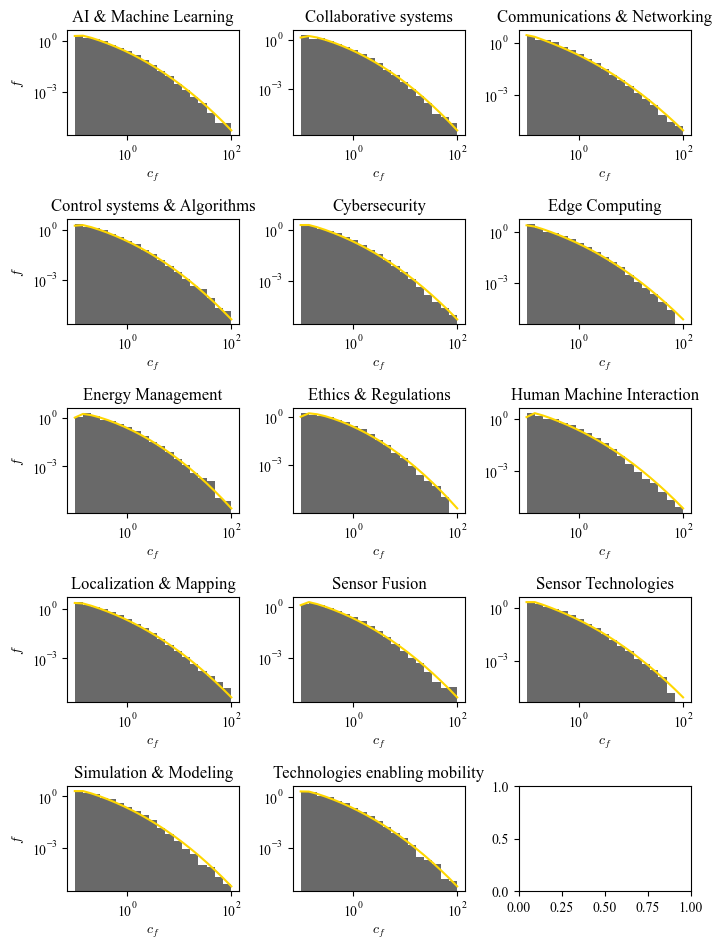

In [1235]:
plot_hist2(dataSets, parameters)
plt.savefig('researchprogress_dists.pdf')  


In [1236]:
def plot_all_pdfs(dataSets, parameters=parameters, keyNames=keyNames):

    bin_edges = np.logspace(0,2,20)

    fig, ax = plt.subplots()

    markers = ['o', 's', '^', 'v', '*', 'x', 'D', 'p', 'h', '+', '>', '<', 'd', '|']

    for index, df in enumerate(dataSets):
        mu = parameters[keyNames[index]]['mu'] #res.params.loc
        sigma = parameters[keyNames[index]]['sigma'] 
        scale = parameters[keyNames[index]]['scale'] 

        dist = stats.lognorm(loc=mu, s = sigma, scale=scale)
        p = dist.pdf(bin_edges)

        marker = markers[index % len(markers)]
        plt.plot(bin_edges, p, marker=marker)
        plt.xscale('log')
        plt.yscale('log')

    ax.legend(fullNames, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.savefig('researchprogress_dists_lines.pdf', format='pdf',  bbox_inches="tight")  
    plt.show()


<Figure size 640x480 with 0 Axes>

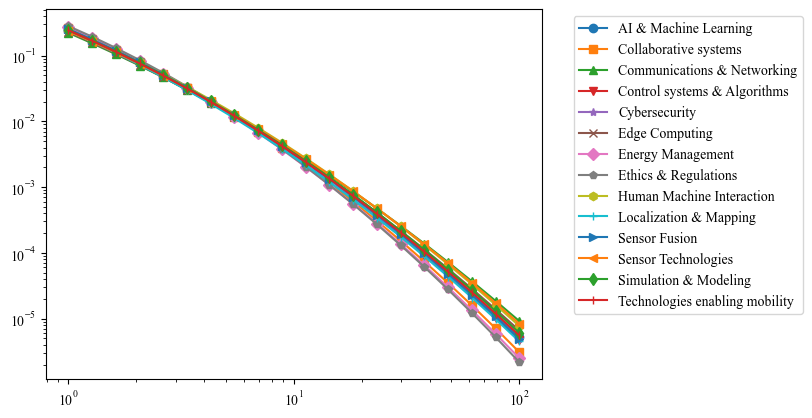

In [1237]:
plot_all_pdfs(dataSets, parameters)

In [1121]:
def test_fit(dataSets, parameters=parameters, keyNames=keyNames):
    bin_edges = np.logspace(0,3,20)
    res_dict = {}
    for index, df in enumerate(dataSets):
        df = cleanData(df)
        vals = df['c_f'].values.tolist()

        mu = parameters[keyNames[index]]["mu"]
        sigma = parameters[keyNames[index]]["sigma"]
        scale = parameters[keyNames[index]]["scale"]
        dist = stats.lognorm(loc=mu, s = sigma, scale=scale)
        hist = plt.hist(vals, bins=bin_edges, density=True)
        x = bin_edges
        p = dist.pdf(x)
        obs = np.array(hist[0])
        exp = np.array(p)
        
        res = stats.ks_2samp(obs, exp)
        print(res)

        res_dict.update({keyNames[index]: {'pvalue': res[1]}})
        res_dict[keyNames[index]].update({'statistic': res[0]})
    
    return res_dict
    
        

In [1122]:
fit_results = test_fit(dataSets)
fit_results

/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


KstestResult(statistic=0.3157894736842105, pvalue=0.23542424272704296, statistic_location=0.0, statistic_sign=1)


/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


KstestResult(statistic=0.2631578947368421, pvalue=0.43375177374306845, statistic_location=0.0, statistic_sign=1)
KstestResult(statistic=0.3157894736842105, pvalue=0.23542424272704296, statistic_location=0.0, statistic_sign=1)


/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


KstestResult(statistic=0.2631578947368421, pvalue=0.43375177374306845, statistic_location=0.0, statistic_sign=1)


/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


KstestResult(statistic=0.2631578947368421, pvalue=0.43375177374306845, statistic_location=0.0, statistic_sign=1)
KstestResult(statistic=0.3684210526315789, pvalue=0.11347310564798593, statistic_location=0.0, statistic_sign=1)
KstestResult(statistic=0.3157894736842105, pvalue=0.23542424272704296, statistic_location=0.0, statistic_sign=1)


/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


KstestResult(statistic=0.3157894736842105, pvalue=0.23542424272704296, statistic_location=0.0, statistic_sign=1)


/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


KstestResult(statistic=0.3157894736842105, pvalue=0.23542424272704296, statistic_location=0.0, statistic_sign=1)
KstestResult(statistic=0.21052631578947367, pvalue=0.6960843302575662, statistic_location=0.0, statistic_sign=1)


/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


KstestResult(statistic=0.3157894736842105, pvalue=0.23542424272704296, statistic_location=0.0, statistic_sign=1)
KstestResult(statistic=0.3157894736842105, pvalue=0.23542424272704296, statistic_location=0.0, statistic_sign=1)
KstestResult(statistic=0.2631578947368421, pvalue=0.43375177374306845, statistic_location=0.0, statistic_sign=1)
KstestResult(statistic=0.3157894736842105, pvalue=0.23542424272704296, statistic_location=0.0, statistic_sign=1)


/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


{'ai_ml': {'pvalue': 0.23542424272704296, 'statistic': 0.3157894736842105},
 'col_sys': {'pvalue': 0.43375177374306845, 'statistic': 0.2631578947368421},
 'com_net': {'pvalue': 0.23542424272704296, 'statistic': 0.3157894736842105},
 'cont_alg': {'pvalue': 0.43375177374306845, 'statistic': 0.2631578947368421},
 'cyb_sec': {'pvalue': 0.43375177374306845, 'statistic': 0.2631578947368421},
 'edg_com': {'pvalue': 0.11347310564798593, 'statistic': 0.3684210526315789},
 'ene_mgm': {'pvalue': 0.23542424272704296, 'statistic': 0.3157894736842105},
 'eth_reg': {'pvalue': 0.23542424272704296, 'statistic': 0.3157894736842105},
 'hum_man': {'pvalue': 0.23542424272704296, 'statistic': 0.3157894736842105},
 'loc_map': {'pvalue': 0.6960843302575662, 'statistic': 0.21052631578947367},
 'sen_fus': {'pvalue': 0.23542424272704296, 'statistic': 0.3157894736842105},
 'sen_tec': {'pvalue': 0.23542424272704296, 'statistic': 0.3157894736842105},
 'sim_mod': {'pvalue': 0.43375177374306845, 'statistic': 0.263157

In [1135]:
c_0_list = []
c_max_list = []
c_f_max_list = []
for index, df in enumerate(dataSets):
    df = cleanData(df)
    c_0_list.append(df['Cited by'].mean())
    c_max_list.append(df['Cited by'].max())
    c_f_max_list.append(df['c_f'].max())

df = pd.DataFrame(parameters).T[['mu', 'sigma']]

df['c_0'] = c_0_list
df['c_max'] = c_max_list
df['c_f_max'] = c_f_max_list


df2 = pd.DataFrame(fit_results).T[['pvalue', 'statistic']]
df = df.join(df2)
df = df.round(2)


df.index = fullNames
print(df)
df.to_excel('output.xlsx')

/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/a

                                  mu  sigma    c_0  c_max  c_f_max  pvalue  \
AI & Machine Learning           0.10   1.57  29.37   3149    96.32    0.24   
Collaborative systems           0.09   1.48  26.90   2811   143.65    0.43   
Communications & Networking     0.10   1.70  29.58   3149    97.56    0.24   
Control systems & Algorithms    0.10   1.55  22.84   2479   124.31    0.43   
Cybersecurity                   0.10   1.57  23.11   5145   249.68    0.43   
Edge Computing                  0.09   1.64  48.72   7208    61.04    0.11   
Energy Management               0.10   1.45  33.70   1868    89.17    0.24   
Ethics & Regulations            0.10   1.42  30.06   2479   122.37    0.24   
Human Machine Interaction       0.11   1.62  23.89   2093   102.17    0.24   
Localization & Mapping          0.09   1.57  34.13   7208   195.37    0.70   
Sensor Fusion                   0.10   1.55  29.12   2680   105.91    0.24   
Sensor Technologies             0.10   1.65  24.57   1868   101.

/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/anaconda3/envs/exjobb/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [1124]:
ai_ml['Cited by'].max()

3149